In [75]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [72]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
if 'cvxopt' not in installedPackages :
    !pip install cvxopt==1.2.5

TEMPLATE FOR IMPLEMENT AND WORK ON SEVERAL CLUSTERING TECHNIQUES

K-means
Hierarchical Clustering (Agglomerative Clustering)
Affinity Propagation


In [45]:
# load dataset
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
dataset = pd.read_excel('/content/drive/My Drive/ProcessedData.xlsx')

In [74]:
dataset

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,3862,3,1,1,1,3,1,4,0,2,3,1,3
3862,3863,3,1,1,1,3,1,4,0,2,3,1,4
3863,3864,5,1,1,0,5,1,4,0,3,5,1,4
3864,3865,2,4,1,7,3,1,3,1,3,2,5,5


In [76]:
# Descriptive Statistics
dataset.shape

(3866, 13)

In [77]:
#Data Preparation
set_option('display.width', 100)
dataset.head(5)

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


In [78]:
# describe data
set_option('precision', 3)
dataset.describe()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
count,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000,3866.000
mean,1933.500,3.107,2.906,1.353,0.938,3.697,1.742,3.043,0.717,2.446,3.561,2.976,3.671
std,1116.162,1.513,1.066,0.478,1.249,1.618,0.934,0.879,0.451,0.743,1.304,1.463,1.184
min,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,967.250,2.000,2.000,1.000,0.000,3.000,1.000,2.000,0.000,2.000,2.000,2.000,3.000
50%,1933.500,3.000,3.000,1.000,0.000,3.000,1.000,3.000,1.000,3.000,4.000,3.000,4.000
75%,2899.750,4.000,4.000,2.000,2.000,5.000,3.000,4.000,1.000,3.000,5.000,4.000,5.000
max,3866.000,6.000,4.000,2.000,8.000,6.000,4.000,4.000,1.000,3.000,5.000,5.000,5.000


In [79]:
#  Data Visualization

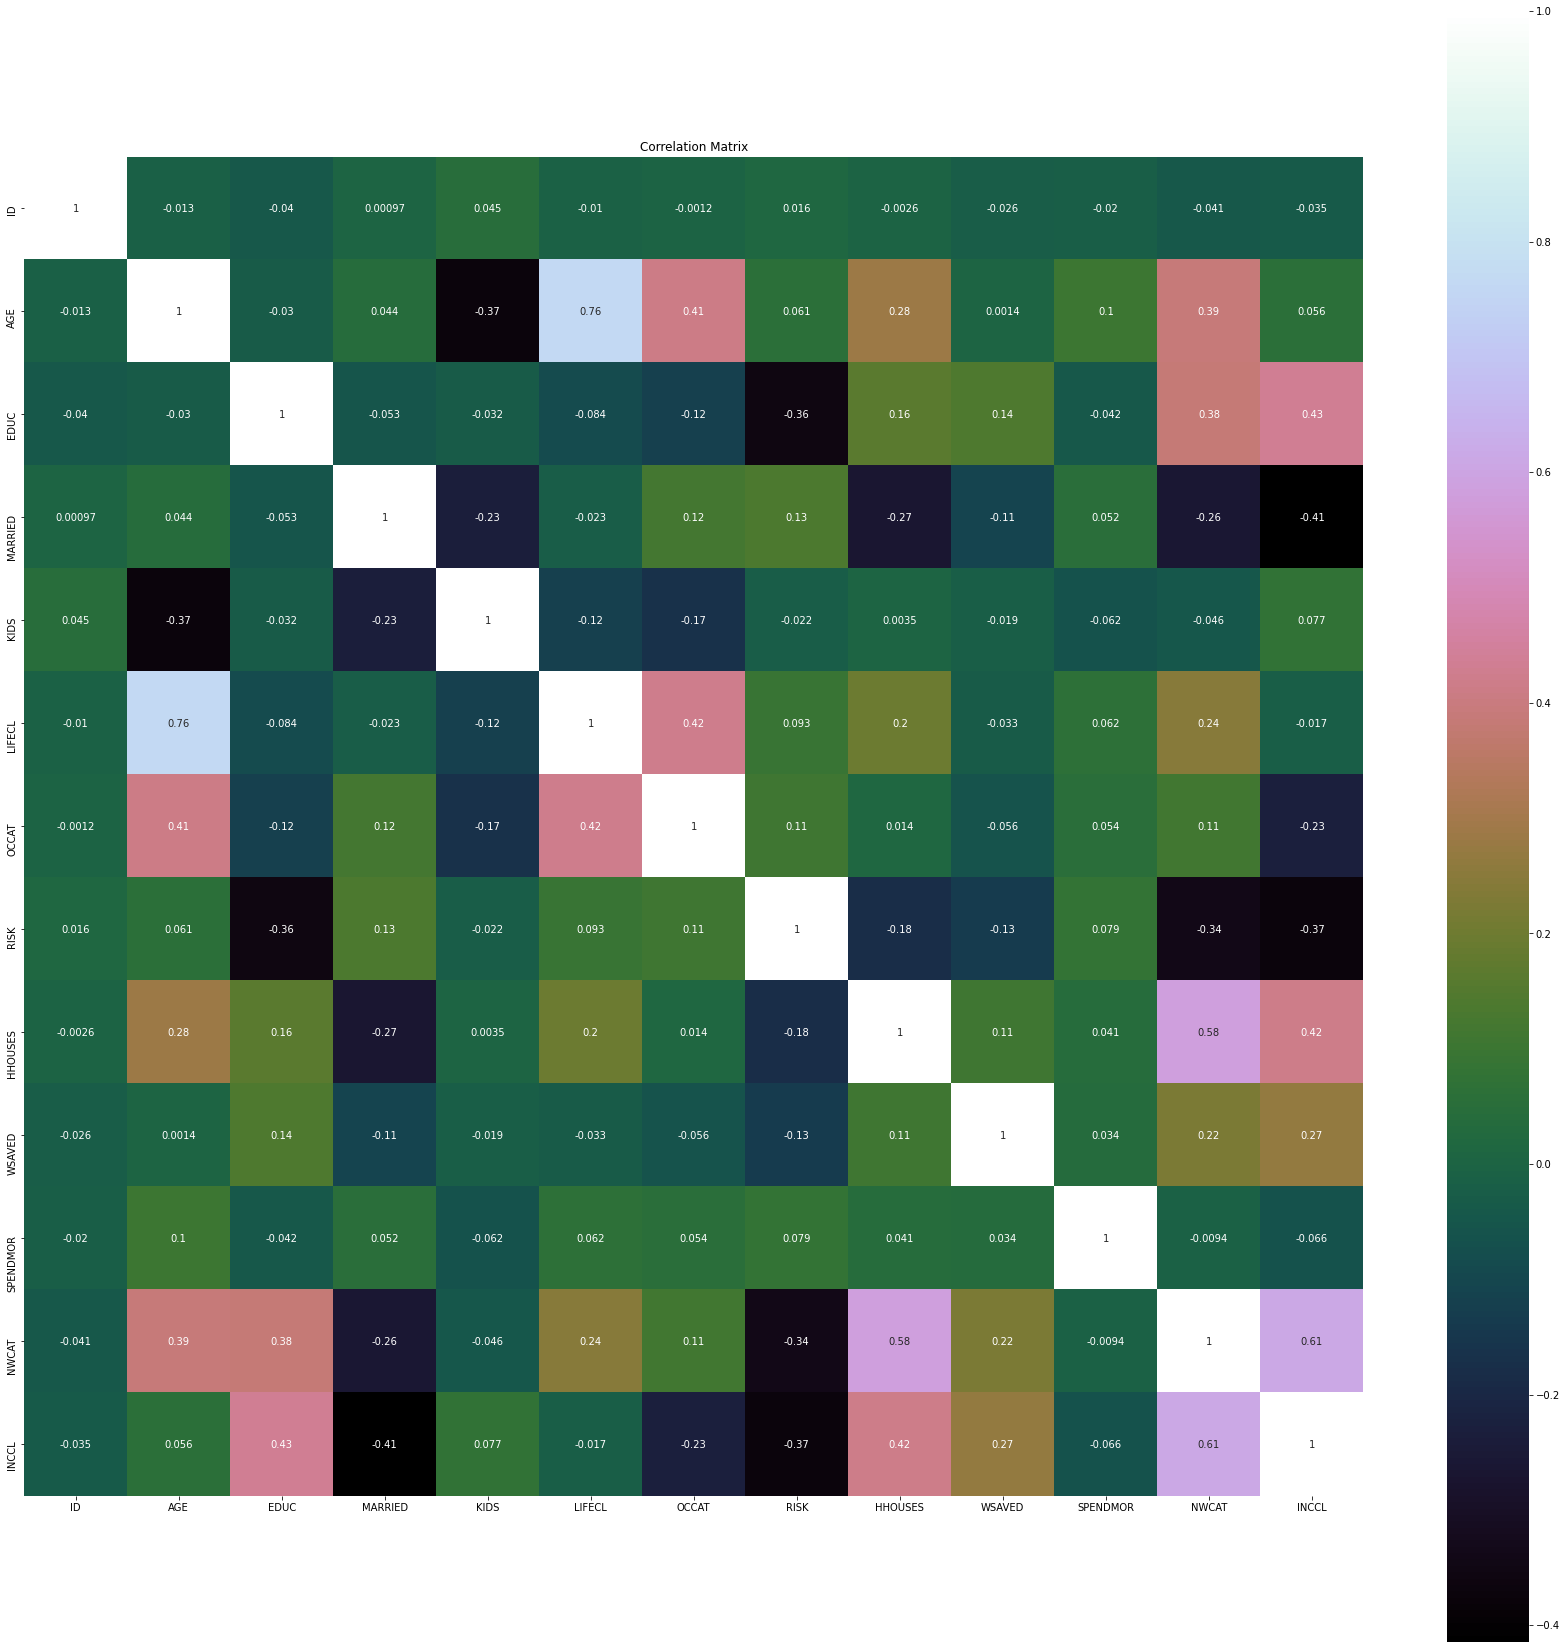

In [80]:
# correlation matrix
correlation = dataset.corr()
plt.figure(figsize=(30,30))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [81]:
# Data Preparation
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [82]:
X=dataset.copy("deep")
X=X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


In [ ]:
# Data Transformation

In [ ]:
# Evaluate Algorithms and Models
K-means
Affinity Propagation 


In [ ]:
# K-Means Clustering
Sum of square errors (SSE) within clusters
Silhouette score

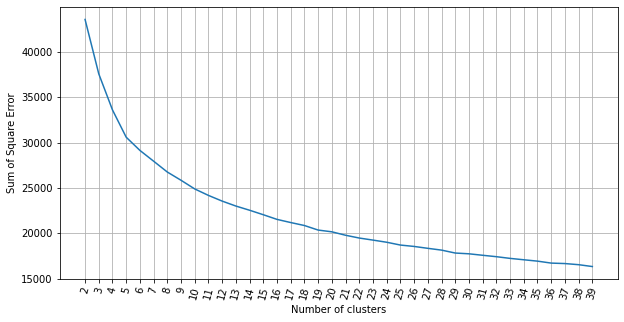

In [83]:
distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)

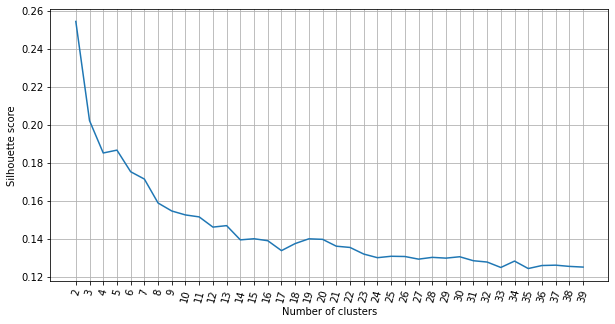

In [84]:
# sihouette score
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid(True)


In [85]:
nclust=7

k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [86]:

target_labels = k_means.predict(X)

In [ ]:
# Affinity Propagation

In [87]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

In [89]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 161


In [ ]:
# Cluster evaluation 


In [90]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.16179048836428078
ap 0.09736878398868973


In [ ]:
# ----------------test purpose 

In [91]:
cluster_output= pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'])],axis = 1)
output=cluster_output.groupby('cluster').mean()
output

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
cluster,,,,,,,,,,,,
0,1.816,2.293,1.352,2.177,3.374,1.483,3.438,0.435,2.208,3.586,1.563,2.948
1,4.664,3.359,1.243,0.309,5.353,2.048,2.849,0.946,2.637,4.535,4.380,4.347
2,2.441,3.421,1.173,1.390,2.677,1.390,2.576,0.945,2.684,4.430,3.881,4.578
3,4.868,2.082,1.591,0.206,5.648,2.427,3.580,0.685,2.236,3.928,2.266,2.591
4,1.907,2.849,1.618,0.007,1.389,1.534,3.172,0.418,2.397,3.448,1.815,3.015
5,2.385,3.444,1.129,1.768,2.880,1.400,2.605,0.888,2.544,1.910,3.883,4.566
6,4.610,3.478,1.239,0.349,5.332,2.044,2.706,0.931,2.569,2.085,4.407,4.503


In [ ]:
Demographics Features

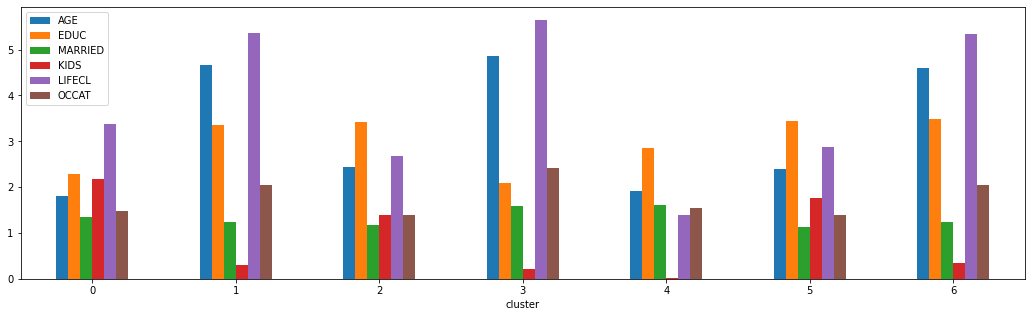

In [92]:
output[['AGE','EDUC','MARRIED','KIDS','LIFECL','OCCAT']].plot.bar(rot=0, figsize=(18,5));

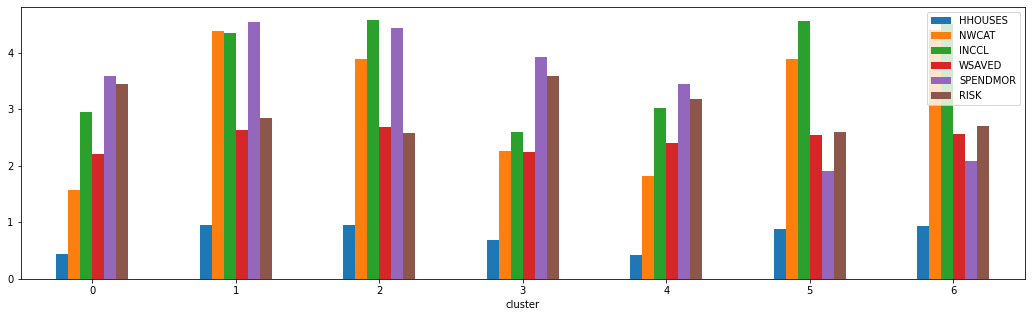

In [93]:
output[['HHOUSES','NWCAT','INCCL','WSAVED','SPENDMOR','RISK']].plot.bar(rot=0, figsize=(18,5));

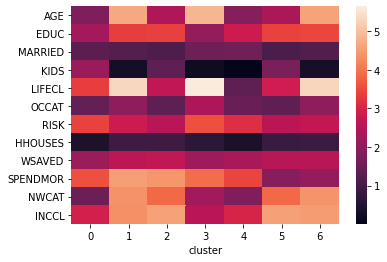

In [94]:
sns.heatmap(output.T)